# HEALTH INSURANCE CLAIM

### importing the necessary data processing packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import klib as k
import warnings
warnings.filterwarnings('ignore')
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso,LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor,GradientBoostingRegressor,HistGradientBoostingRegressor,ExtraTreesRegressor
from sklearn.svm import LinearSVR

In [2]:
df=pd.read_csv('health_insurance.csv')
df.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.00,male,23.20,91,Yes,0,No,southeast,1121.87
1,1,2,24.00,male,30.10,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.30,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.70,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.10,100,No,0,No,northwest,1137.01


In [3]:
df.shape

(1340, 11)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,1340.00,669.50,386.97,0.00,334.75,669.50,1004.25,1339.00
PatientID,1340.00,670.50,386.97,1.00,335.75,670.50,1005.25,1340.00
age,1335.00,38.08,11.10,18.00,29.00,38.00,47.00,60.00
bmi,1340.00,30.67,6.11,16.00,26.27,30.40,34.70,53.10
bloodpressure,1340.00,94.16,11.43,80.00,86.00,92.00,99.00,140.00
children,1340.00,1.09,1.21,0.00,0.00,1.00,2.00,5.00
claim,1340.00,13252.75,12109.61,1121.87,4719.68,9369.61,16604.31,63770.43


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1340 non-null   int64  
 1   PatientID      1340 non-null   int64  
 2   age            1335 non-null   float64
 3   gender         1340 non-null   object 
 4   bmi            1340 non-null   float64
 5   bloodpressure  1340 non-null   int64  
 6   diabetic       1340 non-null   object 
 7   children       1340 non-null   int64  
 8   smoker         1340 non-null   object 
 9   region         1337 non-null   object 
 10  claim          1340 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 115.3+ KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().mean()*100

index           0.00
PatientID       0.00
age             0.37
gender          0.00
bmi             0.00
bloodpressure   0.00
diabetic        0.00
children        0.00
smoker          0.00
region          0.22
claim           0.00
dtype: float64

In [8]:
df.ffill(inplace=True)

In [9]:
df.isnull().mean()*100

index           0.00
PatientID       0.00
age             0.00
gender          0.00
bmi             0.00
bloodpressure   0.00
diabetic        0.00
children        0.00
smoker          0.00
region          0.00
claim           0.00
dtype: float64

#### converting object data to numeric

In [10]:
le=LabelEncoder()
df['gender']=le.fit_transform(df['gender'])
df['diabetic']=le.fit_transform(df['diabetic'])
df['smoker']=le.fit_transform(df['smoker'])
df['region']=le.fit_transform(df['region'])

### Now I am performing some EDA on dataset

### data visualisation

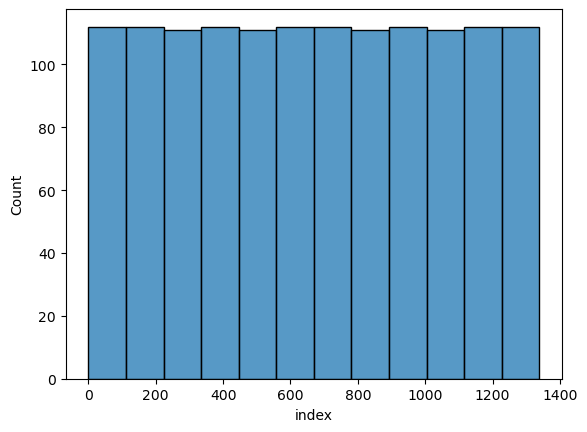

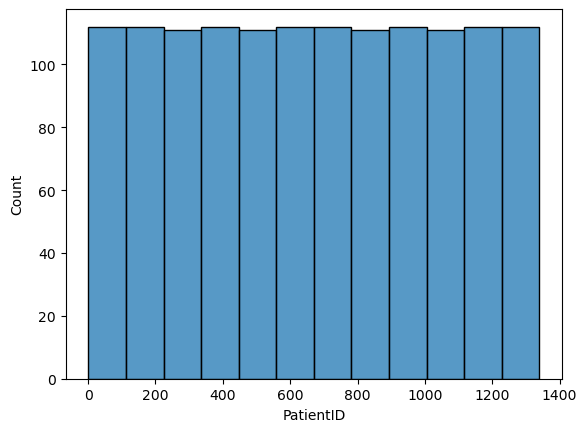

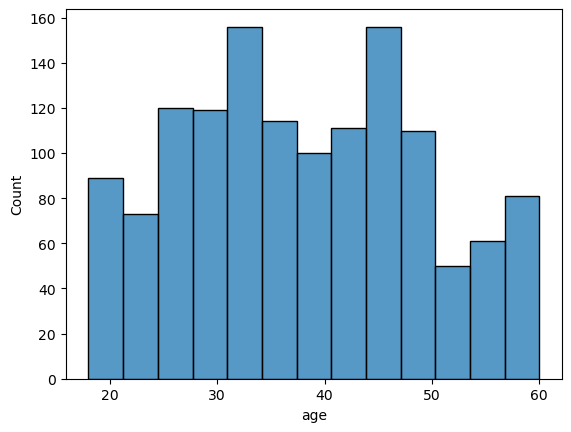

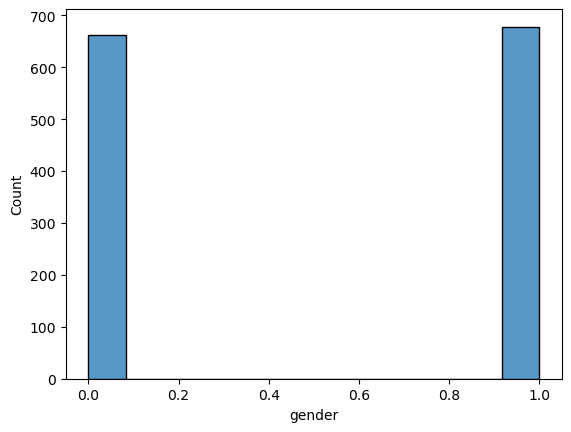

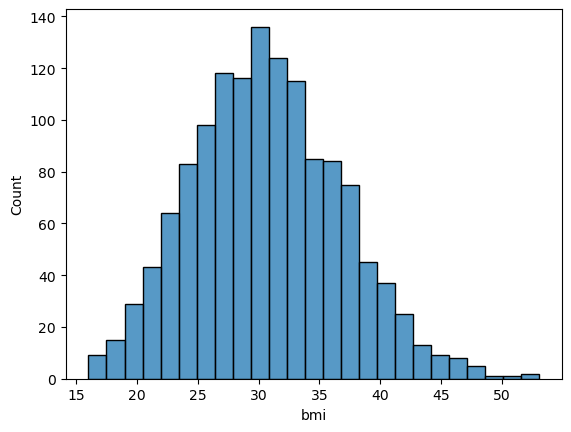

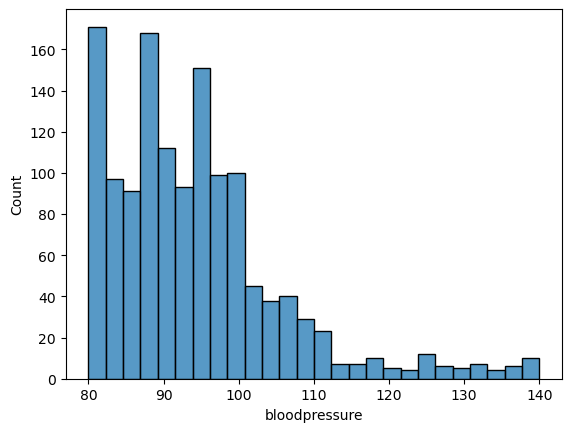

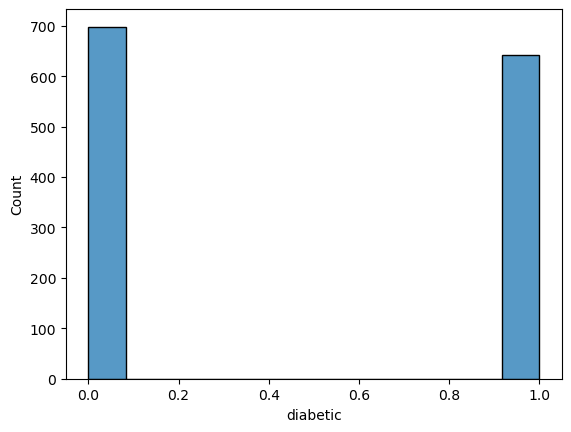

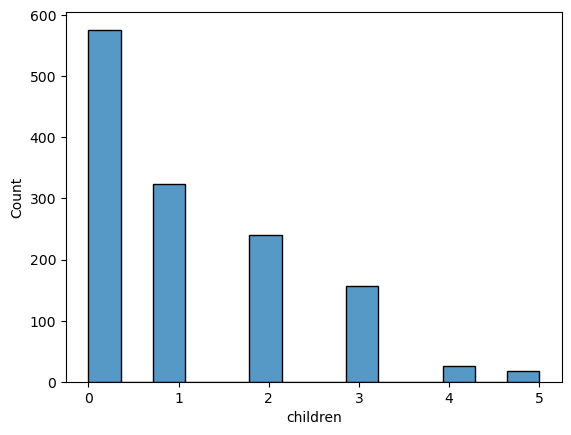

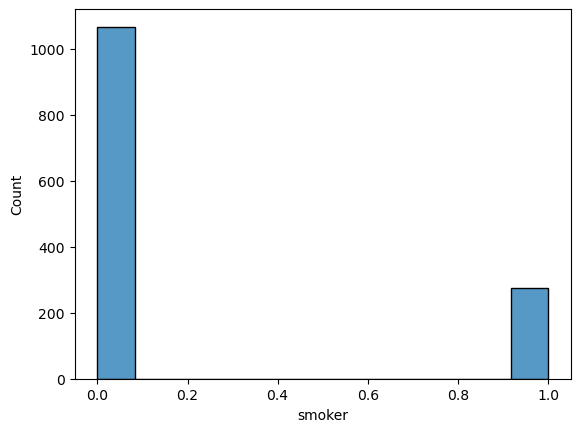

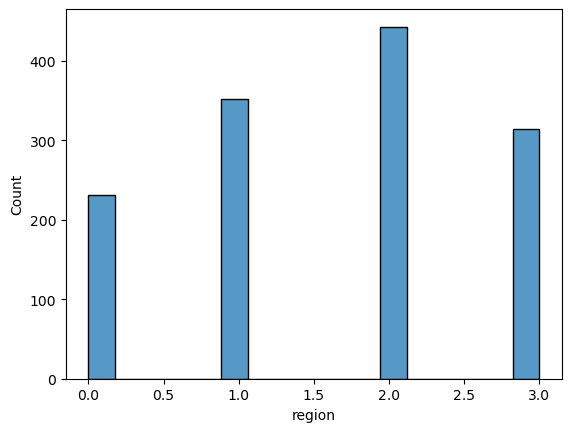

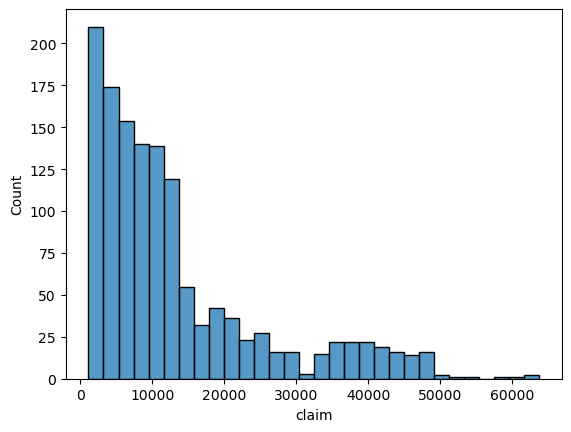

In [13]:
for i in df.columns:
    if df[i].dtypes !='object':
        sns.histplot(x=df[i])
        plt.show()

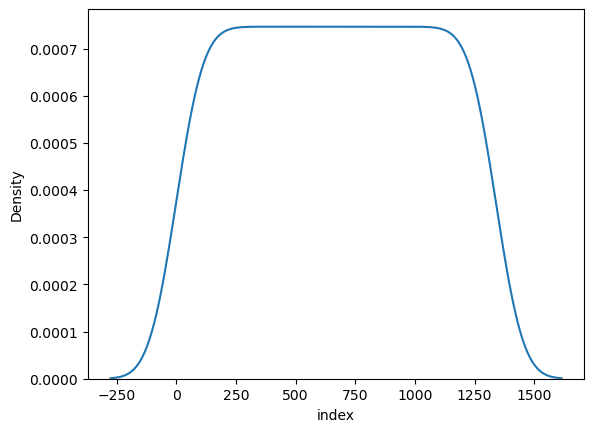

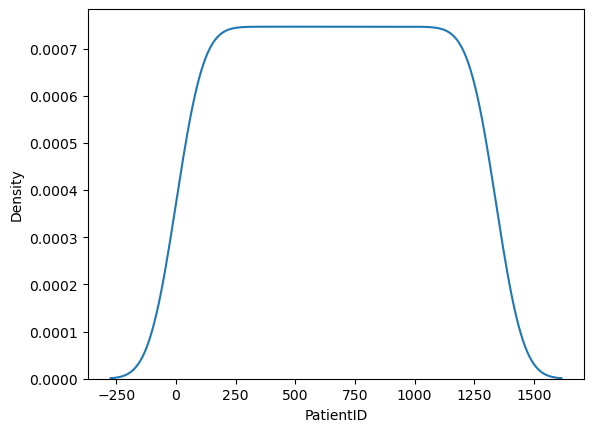

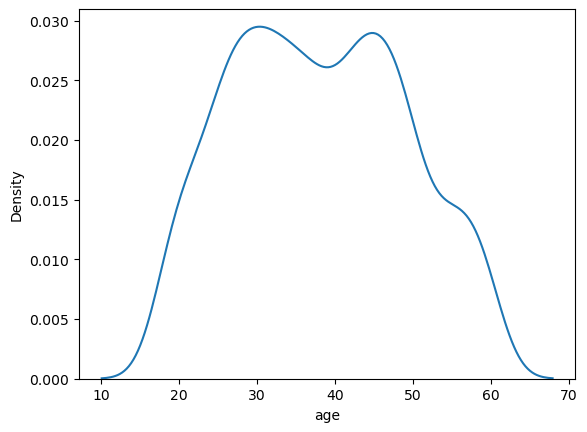

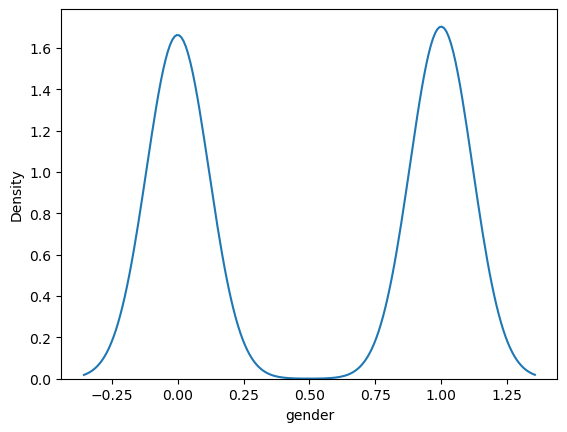

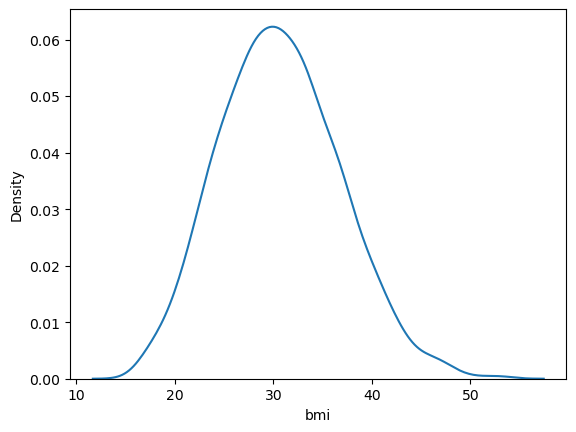

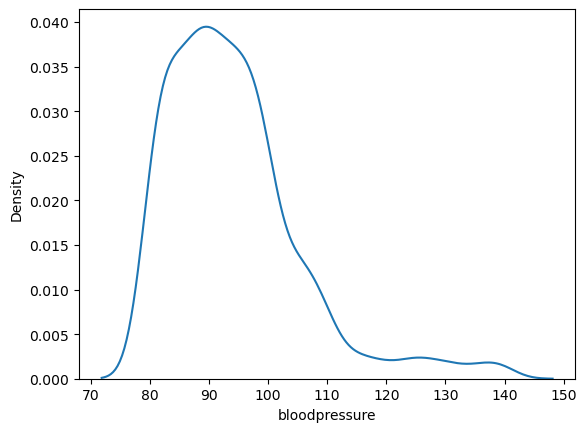

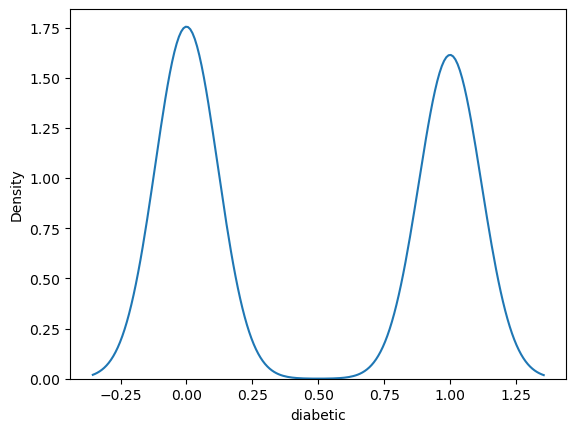

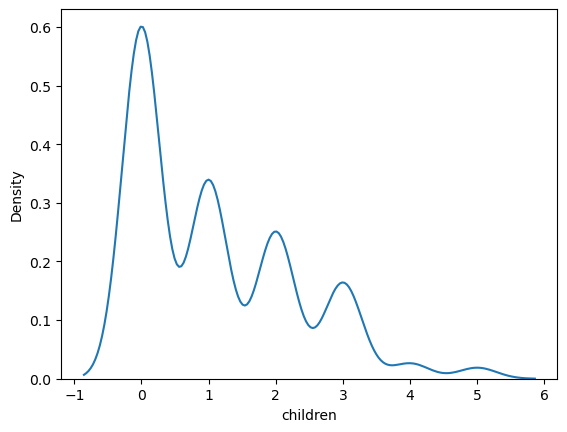

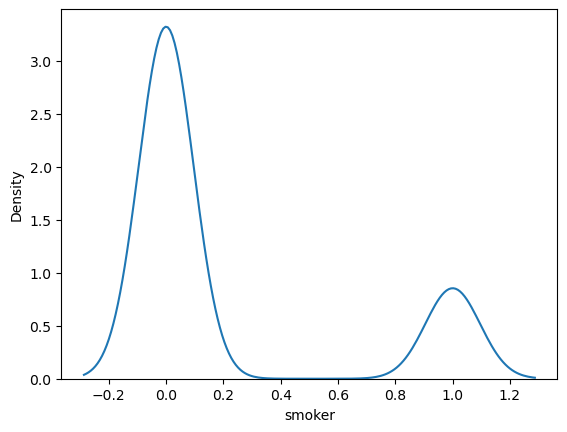

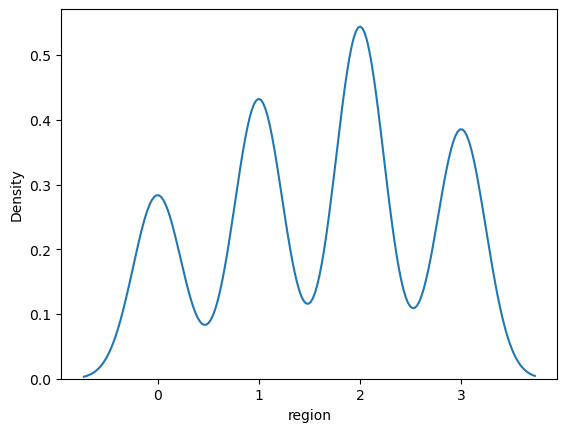

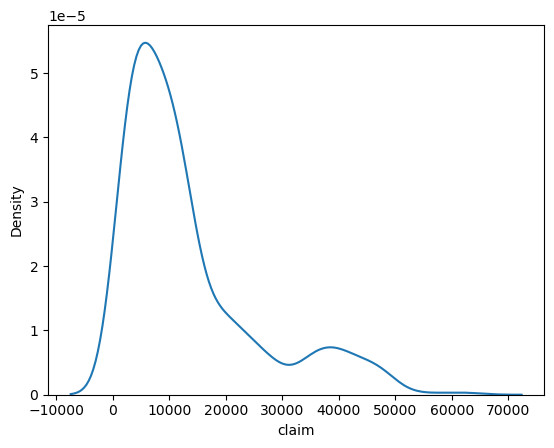

In [14]:
for i in df.columns:
    if df[i].dtypes !='object':
        sns.kdeplot(x=df[i])
        plt.show()

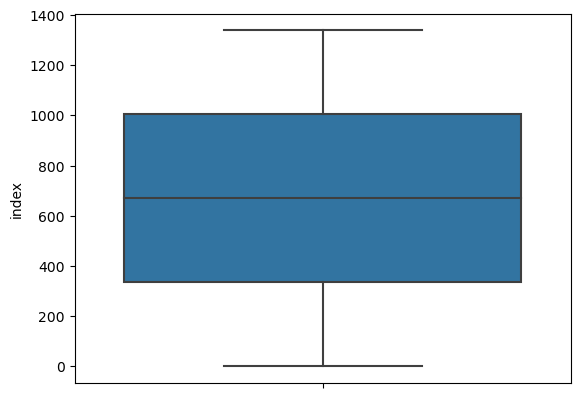

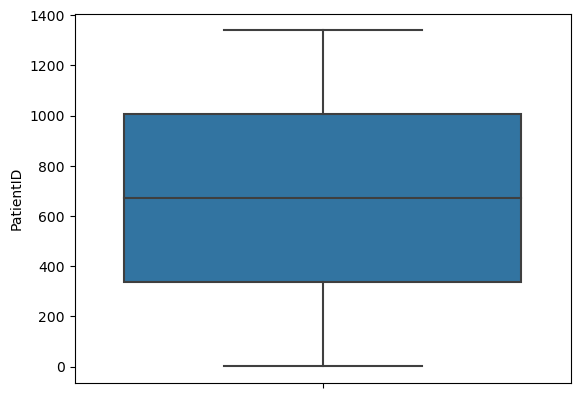

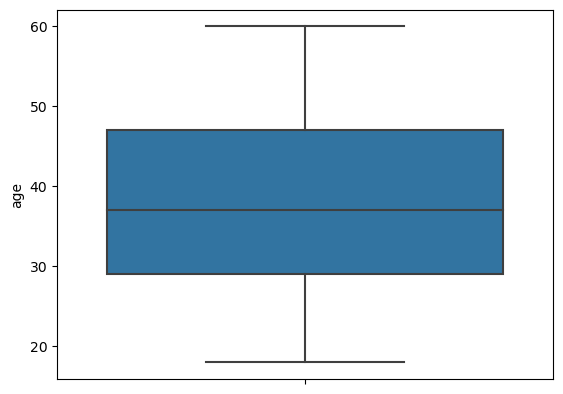

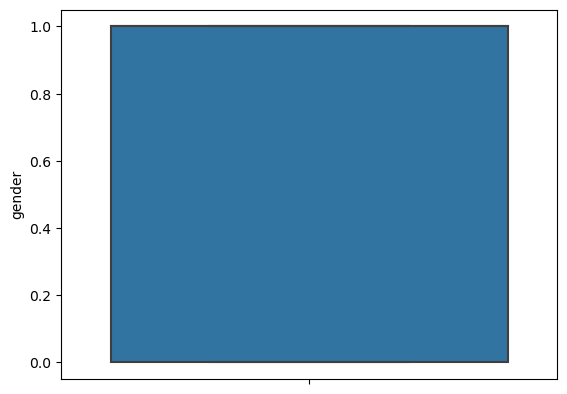

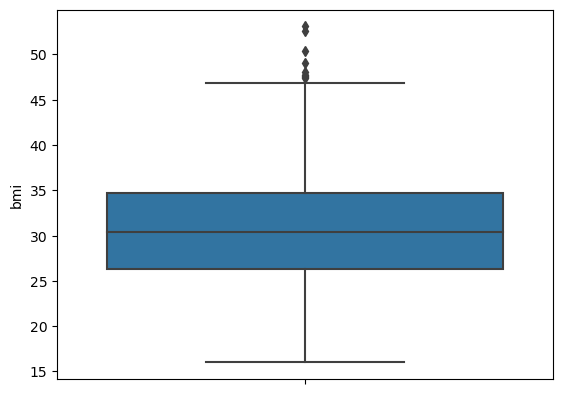

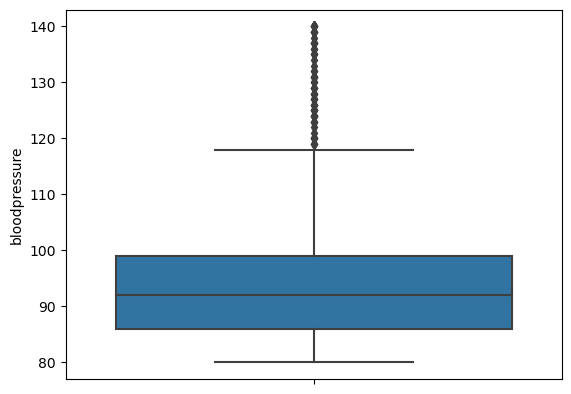

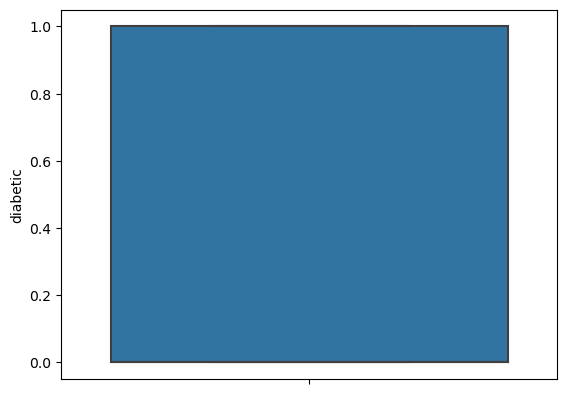

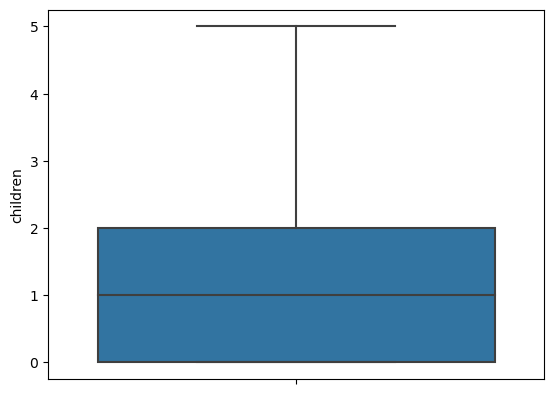

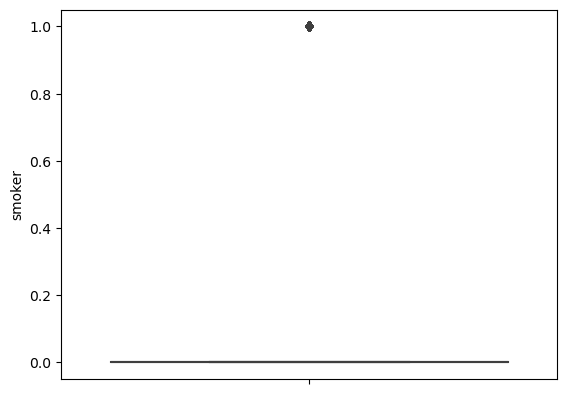

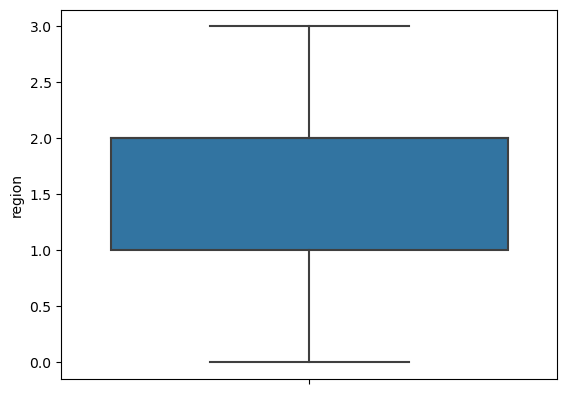

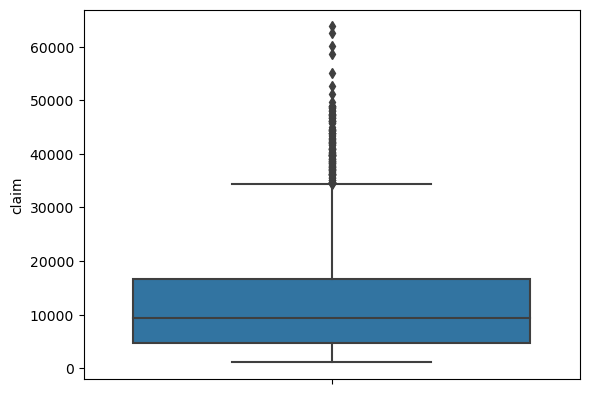

In [15]:
for i in df.columns:
    if df[i].dtypes !='object':
        sns.boxplot(y=df[i])
        plt.show()

### Treating outliers

In [16]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile(col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL

In [17]:
for i in df.columns:
    if df[i].dtypes !='object':
        UL,LL=outlier_limit(df[i])
        df[i]=np.where((df[i]>UL)|(df[i]<LL),np.nan,df[i])

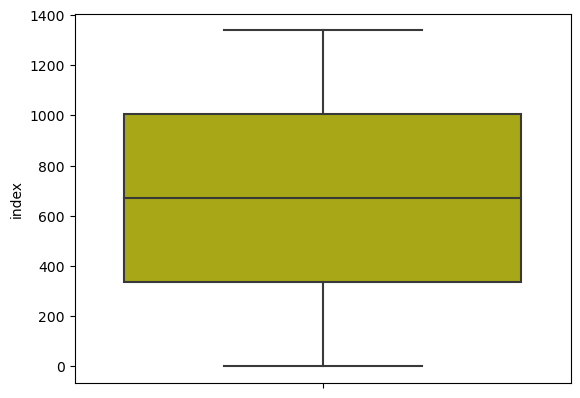

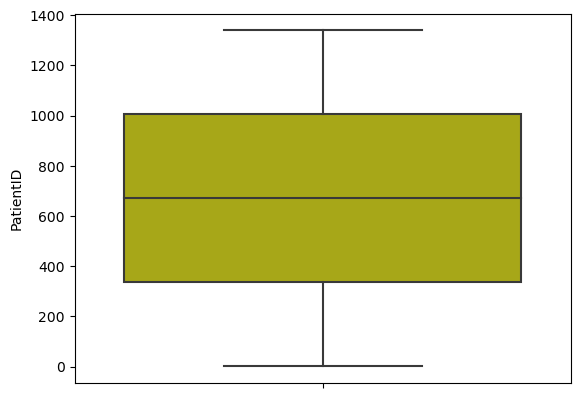

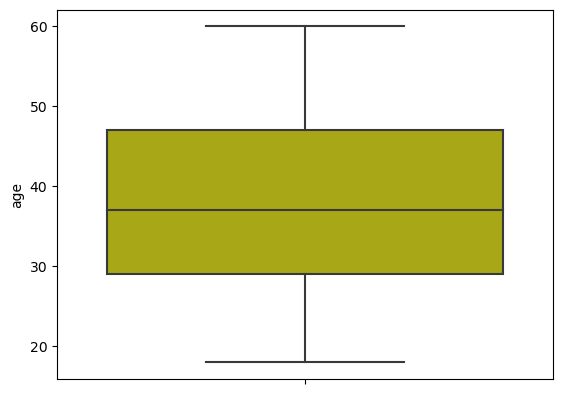

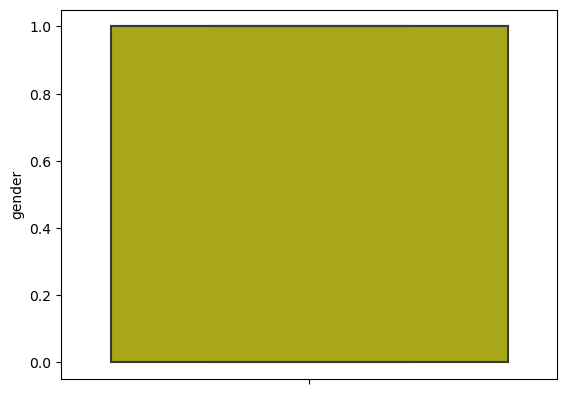

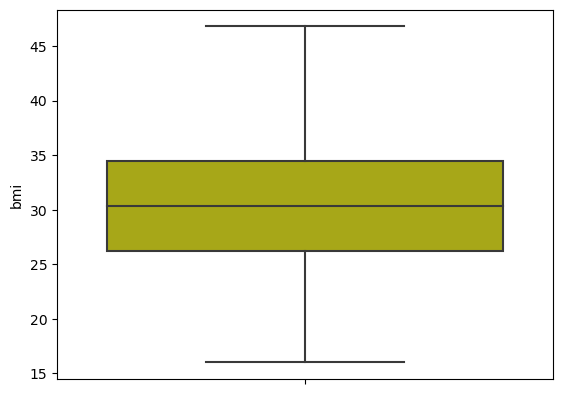

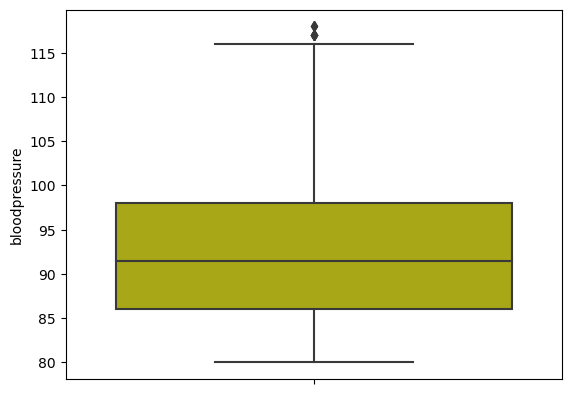

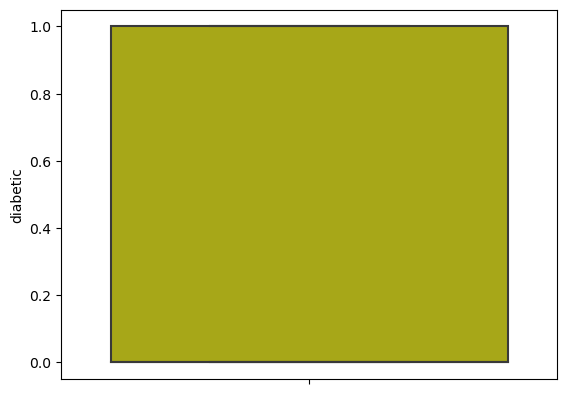

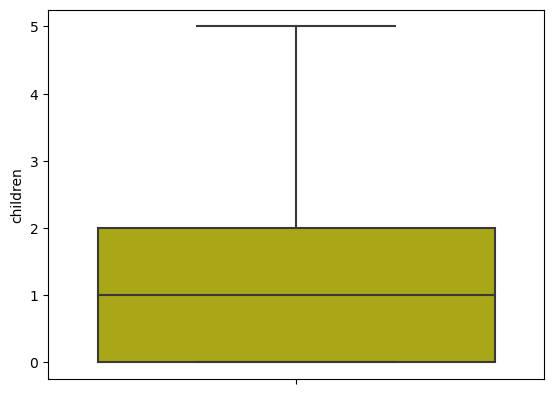

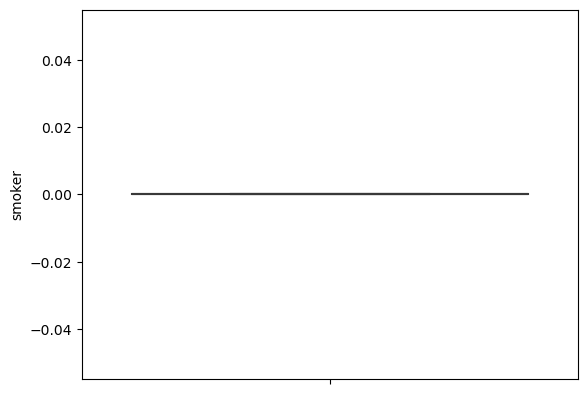

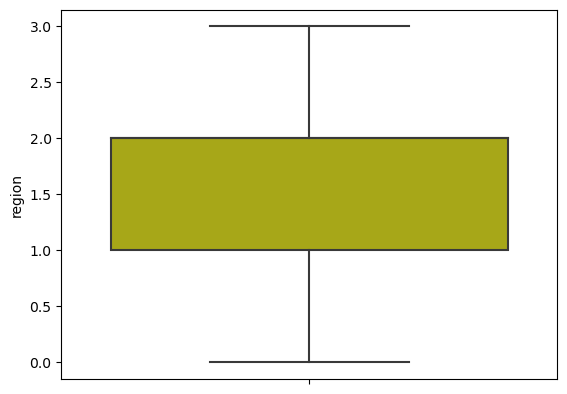

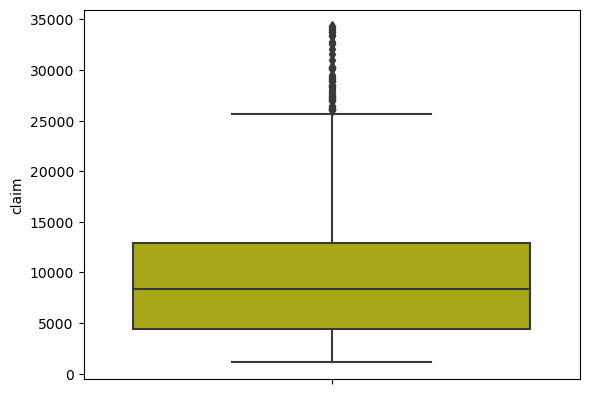

In [18]:
for i in df.columns:
    if df[i].dtypes !='object':
        sns.boxplot(y=df[i], color='y')
        plt.show()

In [19]:
df.dropna(inplace=True)

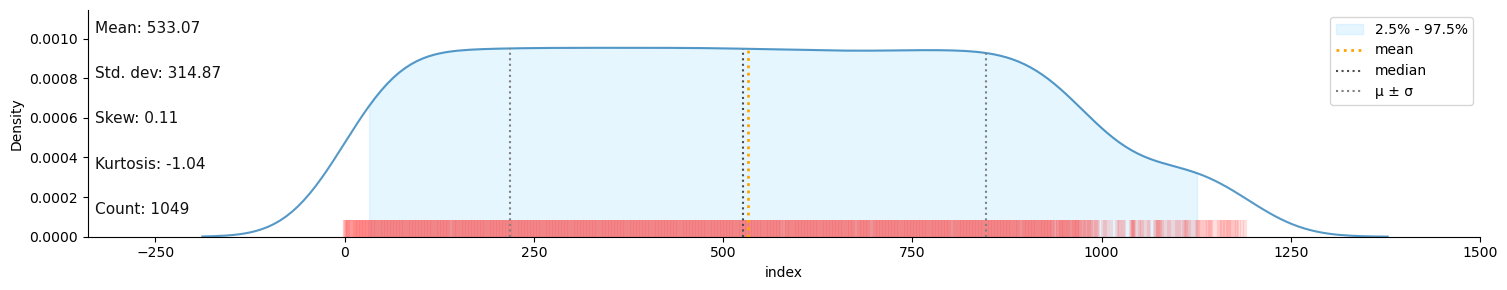

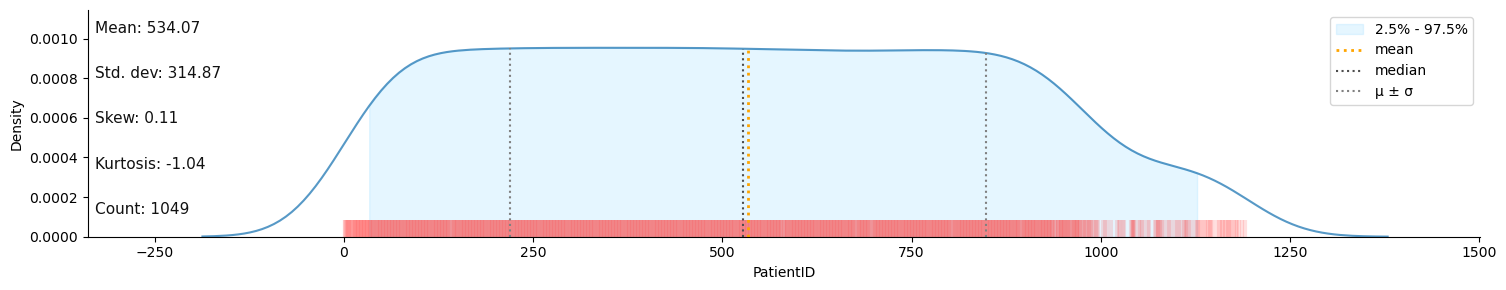

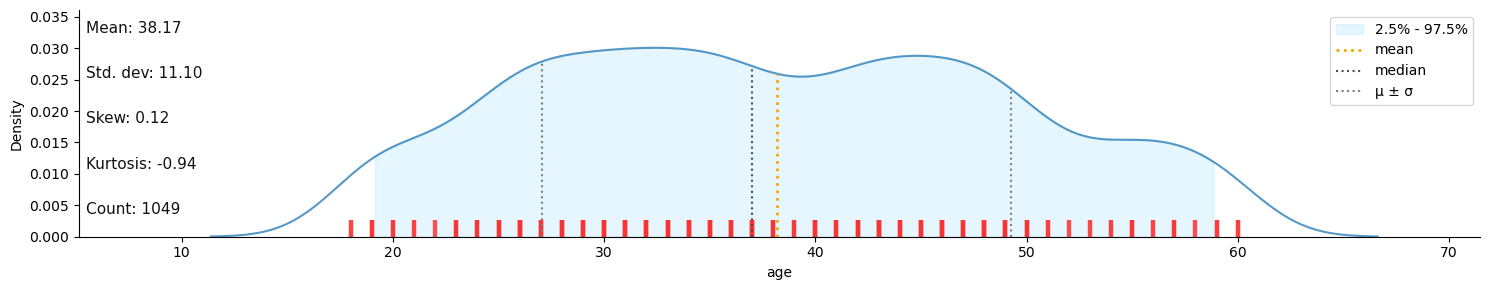

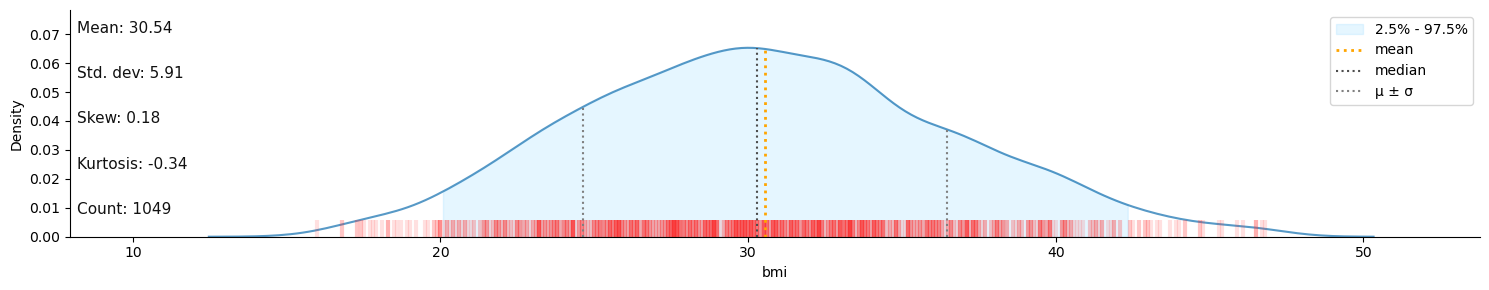

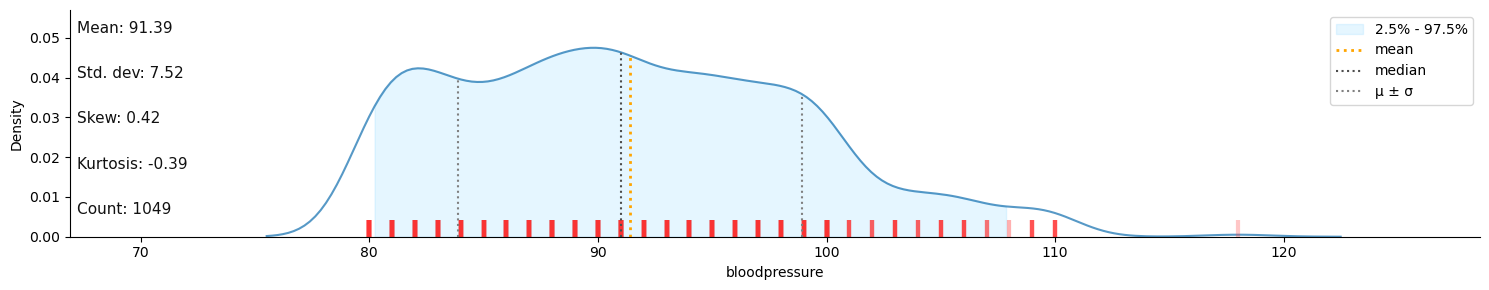

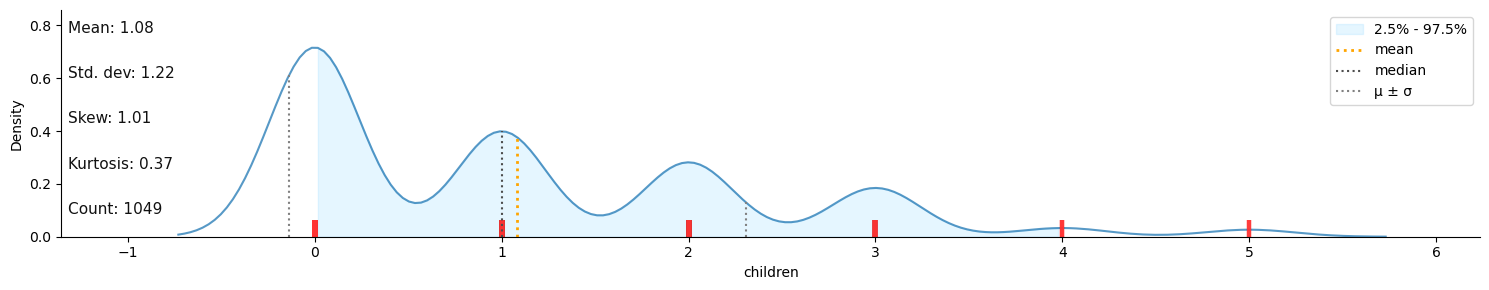

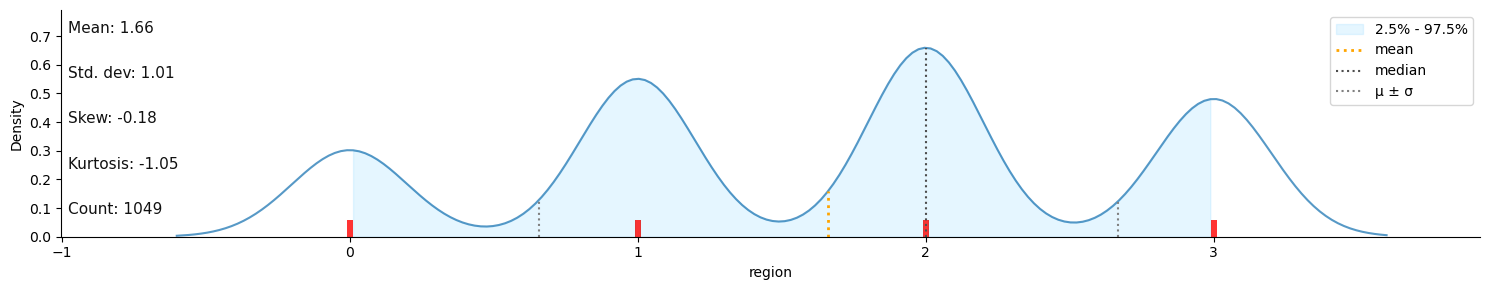

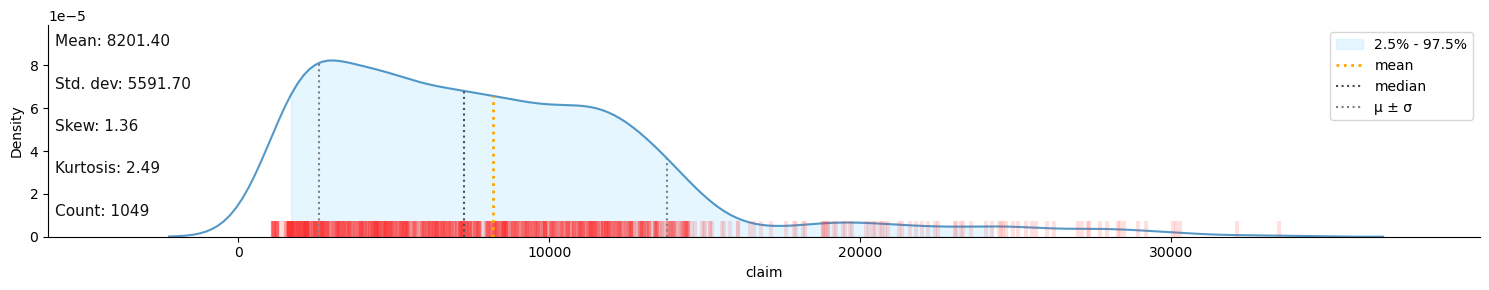

In [20]:
k.dist_plot(data=df);

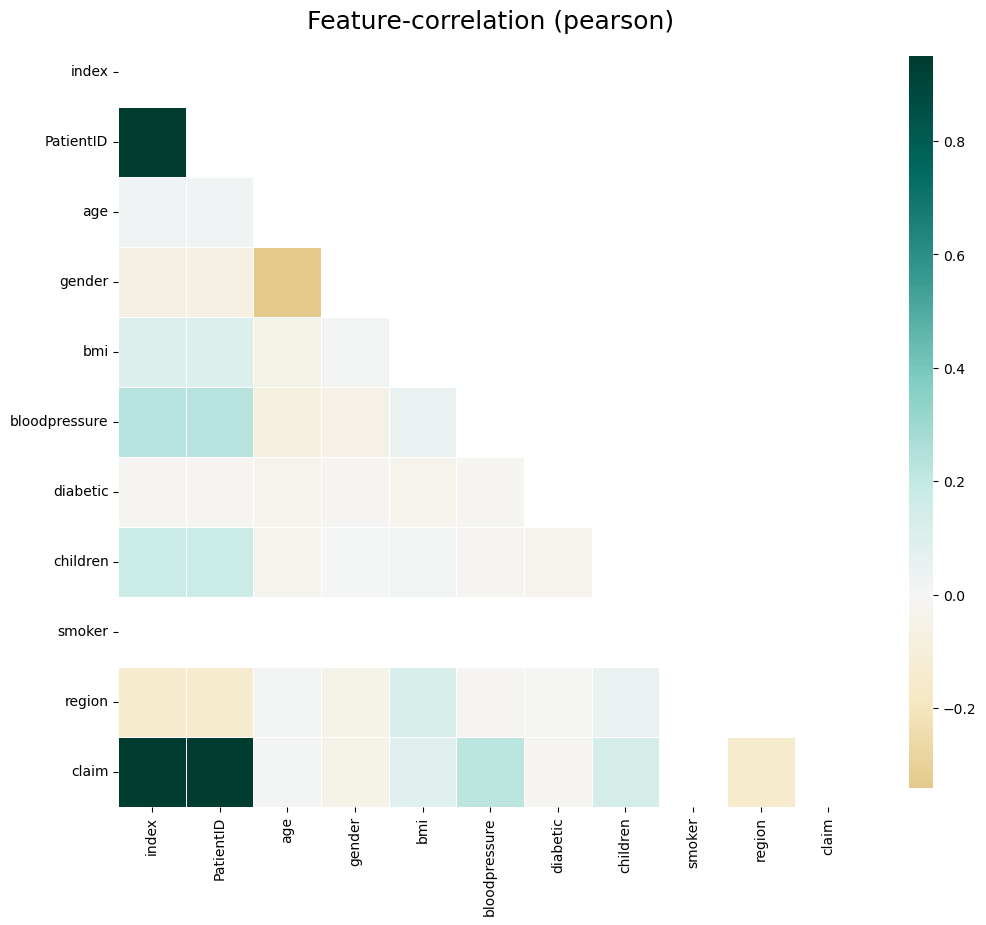

In [21]:
k.corr_plot(data=df,annot=False);

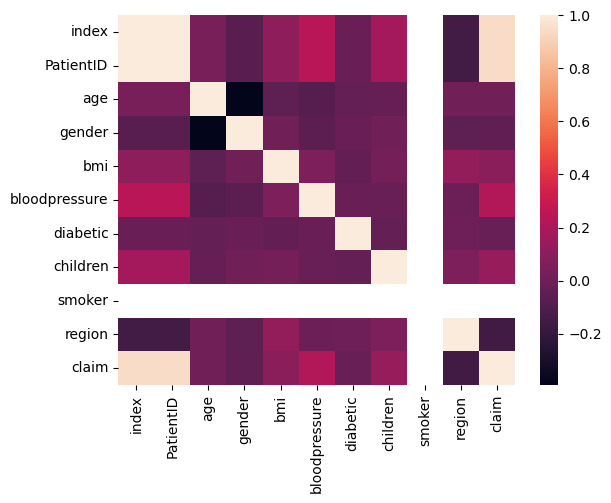

In [22]:
sns.heatmap(data=df.corr(), annot=False)
plt.show()

In [23]:
df.columns

Index(['index', 'PatientID', 'age', 'gender', 'bmi', 'bloodpressure',
       'diabetic', 'children', 'smoker', 'region', 'claim'],
      dtype='object')

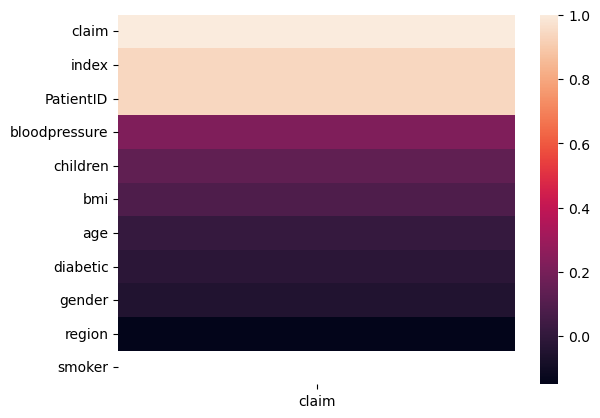

In [25]:
sns.heatmap(df.corr()[['claim']].sort_values(by='claim', ascending=False));

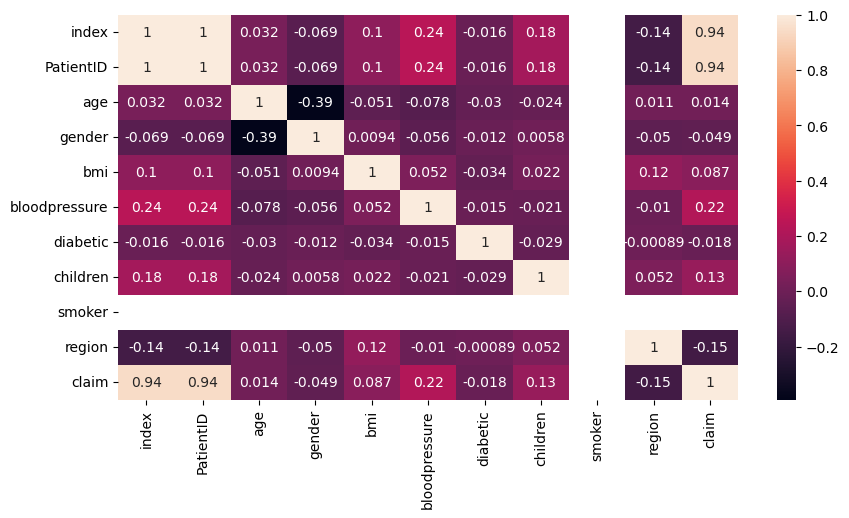

In [26]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [27]:
df.corr()[['claim']].sort_values(by='claim', ascending=False)

,claim
claim,1.00
index,0.94
PatientID,0.94
bloodpressure,0.22
children,0.13
bmi,0.09
age,0.01
diabetic,-0.02
gender,-0.05
region,-0.15


In [28]:
df.corr()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
index,1.00,1.00,0.03,-0.07,0.10,0.24,-0.02,0.18,NaN,-0.14,0.94
PatientID,1.00,1.00,0.03,-0.07,0.10,0.24,-0.02,0.18,NaN,-0.14,0.94
age,0.03,0.03,1.00,-0.39,-0.05,-0.08,-0.03,-0.02,NaN,0.01,0.01
gender,-0.07,-0.07,-0.39,1.00,0.01,-0.06,-0.01,0.01,NaN,-0.05,-0.05
bmi,0.10,0.10,-0.05,0.01,1.00,0.05,-0.03,0.02,NaN,0.12,0.09
bloodpressure,0.24,0.24,-0.08,-0.06,0.05,1.00,-0.01,-0.02,NaN,-0.01,0.22
diabetic,-0.02,-0.02,-0.03,-0.01,-0.03,-0.01,1.00,-0.03,NaN,-0.00,-0.02
children,0.18,0.18,-0.02,0.01,0.02,-0.02,-0.03,1.00,NaN,0.05,0.13
smoker,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,-0.14,-0.14,0.01,-0.05,0.12,-0.01,-0.00,0.05,NaN,1.00,-0.15


In [29]:
x=df[['index','PatientID','bloodpressure']].values

In [30]:
y=df[['claim']].values

In [31]:
sc=StandardScaler()

In [32]:
x=sc.fit_transform(x)

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

### model building

In [34]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

In [35]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  1735.8952594141915
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  1734.4295764834715
****************************************************************************************************
cross validation model : LinearSVR
AVERAGE RMSE:  7539.809948558252
****************************************************************************************************
cross validation model : DecisionTreeRegressor
AVERAGE RMSE:  1228.314517065411
****************************************************************************************************
cross validation model : GradientBoostingRegressor
AVERAGE RMSE:  1221.7663918730973
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVERAGE RMSE:  2074.6743086995725
********************************************

In [36]:
models={
    'LinearRegression':LinearRegression(),
    'Ridge':Ridge(),
    'LinearSVR':LinearSVR(),
    'Lasso':Lasso(),
    'GradientBoostingRegressor':GradientBoostingRegressor(),
    'BaggingRegressor':BaggingRegressor(),
    'ExtraTreesRegressor':ExtraTreesRegressor(),
    'HistGradientBoostingRegressor':HistGradientBoostingRegressor(),
    'DecisionTreeRegressor':DecisionTreeRegressor(),
    'AdaBoostRegressor':AdaBoostRegressor(),
    'RandomForestRegressor':RandomForestRegressor(),

}

In [37]:
for name,model in models.items():
    model.fit(x_train,y_train)
    print('model trained with {}'.format(name))
    training_score =model.score(x_train, y_train)*100
    testing_score =model.score(x_test,y_test)*100
    score=r2_score(y_test,model.predict(x_test))*100
    mae=mean_absolute_error(y_test,model.predict(x_test))
    mse=mean_squared_error(y_test,model.predict(x_test))
    rmse=np.sqrt(mse)
    print('r2score:',score)
    print('training_score:',training_score)
    print('testing_score:',testing_score)
    print('mae:',mae)
    print('mse:',mse)
    print('rmse_test:',rmse)
    print('*'*100)

model trained with LinearRegression
r2score: 86.52030491553937
training_score: 89.1008952908913
testing_score: 86.52030491553937
mae: 1265.0878022788597
mse: 4058321.9090050003
rmse_test: 2014.527713635382
****************************************************************************************************
model trained with Ridge
r2score: 86.51941587329614
training_score: 89.10086286671635
testing_score: 86.51941587329614
mae: 1263.7876268217456
mse: 4058589.5723008793
rmse_test: 2014.594145802295
****************************************************************************************************
model trained with LinearSVR
r2score: -210.86293166188076
training_score: -167.84853641338074
testing_score: -210.86293166188076
mae: 7931.423026053351
mse: 93591274.75481877
rmse_test: 9674.258356836392
****************************************************************************************************
model trained with Lasso
r2score: 86.51896420330453
training_score: 89.10088703889726
testi

#### Lazyprediction

In [38]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)

In [39]:
models, predictions = reg.fit(x_train, x_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:08<00:00,  4.74it/s]


In [40]:
model_dictionary = reg.provide_models(x_train, x_test, y_train, y_test)
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,1.00,1.00,100.41,0.23
ExtraTreesRegressor,1.00,1.00,111.37,0.17
BaggingRegressor,1.00,1.00,128.45,0.03
GradientBoostingRegressor,1.00,1.00,141.70,0.08
DecisionTreeRegressor,1.00,1.00,147.18,0.01
ExtraTreeRegressor,1.00,1.00,156.52,0.01
XGBRegressor,1.00,1.00,157.00,0.07
GaussianProcessRegressor,1.00,1.00,279.44,0.07
AdaBoostRegressor,0.99,0.99,435.70,0.09


In [41]:
model=ExtraTreesRegressor()

In [42]:
model.fit(x_train,y_train)

ExtraTreesRegressor()

In [43]:
y_pred = model.predict(x)

In [44]:
PREDICTION = pd.DataFrame(zip(y, y_pred), columns=('ACTUAL', 'PREDICTED'), dtype=float)
PREDICTION

,ACTUAL,PREDICTED
0,1121.87,1121.87
1,1131.51,1128.46
2,1135.94,1132.20
3,1136.40,1136.40
4,1137.01,1137.01
...,...,...
1044,30063.58,30063.58
1045,30166.62,30166.62
1046,30284.64,30716.66
1047,32108.66,32149.83


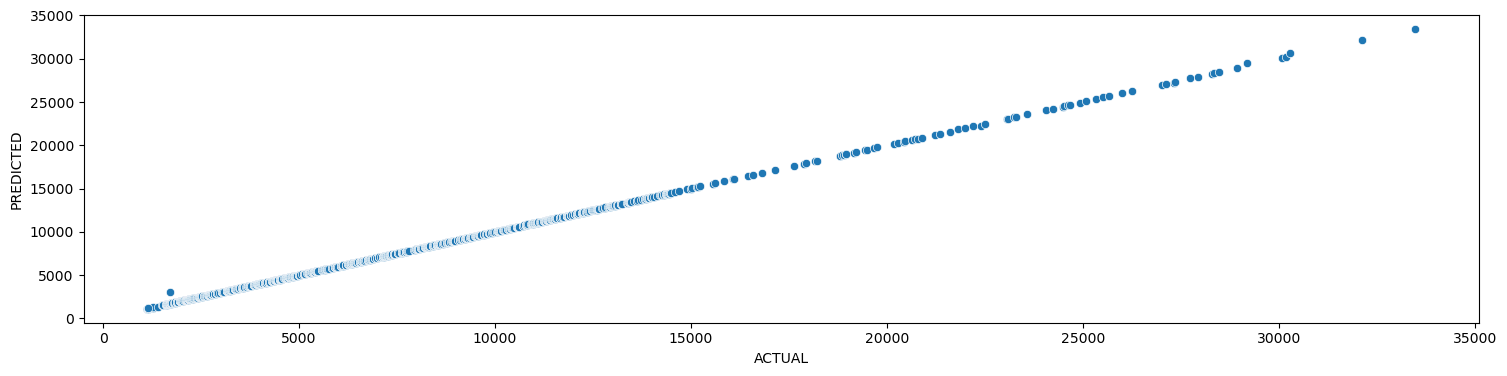

In [45]:
plt.figure(figsize=(18,4))
sns.scatterplot(data=PREDICTION, x='ACTUAL',y='PREDICTED')
plt.show()

In [49]:
HI_CLEAN= df.to_csv('HI clean')